In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd
import PIL
import time
import os
from helper import get_car_paths, get_cars_df
import random
from sklearn.model_selection import train_test_split

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
from torch import nn
import torch.optim as optim

from fastai import *
from fastai.vision import *

In [3]:
def seed_all(seed=42):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)

seed_all(seed=42)

# Download and Untar Data

In [4]:
train_path, test_path = get_car_paths()
train_df = get_cars_df('cars_train_annos.mat')
test_df = get_cars_df('cars_test_annos_withlabels.mat')

In [5]:
def get_train_test_data(tfms=None, bs=32, sz=224, padding_mode='reflection', normalize=None):
    train_path, test_path = get_car_paths()
    train_df = get_cars_df('cars_train_annos.mat')
    test_df = get_cars_df('cars_test_annos_withlabels.mat')
    train_val_data = ImageDataBunch.from_df(train_path, train_df,
                                      ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs, padding_mode=padding_mode)
    test_data = ImageDataBunch.from_df(test_path, test_df,
                                      ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs, padding_mode=padding_mode)
    if normalize is not None:
        if normalize == "imagenet":
            train_val_data.normalize(imagenet_stats)
            test_data.normalize(imagenet_stats)
        elif normalize == "batch_stats":
            train_val_data.normalize()
            test_data.normalize(train_val_data.batch_stats())
        else:
            print("No normalization")
    return train_val_data, test_data

# Resnet50 40 Epochs bs 32, size=300x300

In [6]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [7]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


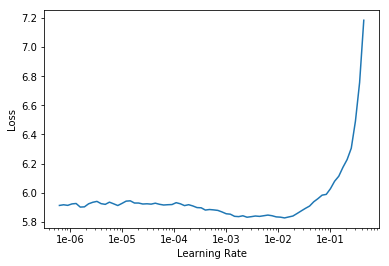

In [8]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,5.374745,4.702300,0.059582,01:05
1,4.405979,3.723193,0.242629,00:59
2,3.439816,2.826217,0.390663,00:59
3,2.715753,2.384687,0.452703,00:59
4,2.155941,2.064987,0.531941,00:59
5,1.958253,2.358379,0.433047,01:00
6,1.818895,2.223970,0.418919,01:00
7,1.661903,1.732421,0.539312,01:00
8,1.490926,2.274279,0.438575,00:59
9,1.383215,1.442426,0.627150,00:59


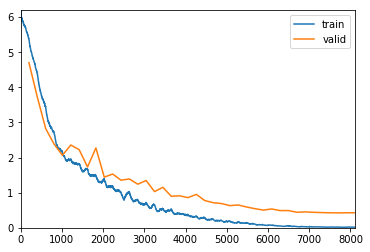

In [8]:
lr = 1e-3
wd = 1e-1
learn.fit_one_cycle(40, max_lr=lr, wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [9]:
learn.save('res50_40epochs')

# Resnet50 20 Epochs bs 64, size=300x300

In [6]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [7]:
tfms = get_transforms()
sz = (300, 300)    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [8]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


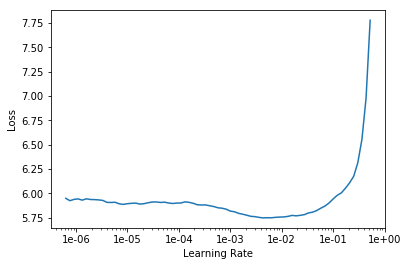

In [9]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,5.266619,4.478752,0.093366,00:56
1,4.009206,3.396544,0.254914,00:54
2,3.053596,3.190016,0.246314,00:55
3,2.614724,3.919404,0.149263,00:54
4,2.419623,3.134071,0.231572,00:54
5,2.029357,3.861951,0.181204,00:54
6,1.711986,2.216925,0.409091,00:54
7,1.446769,1.844522,0.518427,00:54
8,1.205150,1.796127,0.529484,00:54
9,1.042216,1.575210,0.555897,00:54


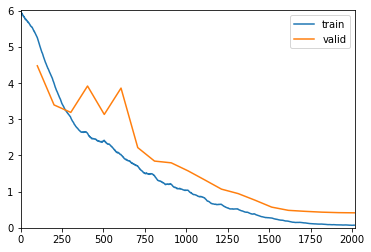

In [10]:
lr = 2e-3
wd = 1e-1
learn.fit_one_cycle(20, max_lr=lr, wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [9]:
learn.save('res50_20epochs_64bs')

# Resnet50 20 Epochs bs 64 wd 1e-5, size=300x300

In [16]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [17]:
tfms = get_transforms()
sz = (300, 300)    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [18]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.160089,4.398180,0.092752,00:54
1,3.938014,3.369240,0.258600,00:55
2,2.948314,3.179510,0.273342,00:55
3,2.596850,4.852266,0.095209,00:54
4,2.393351,4.262276,0.152334,00:54
5,2.069522,3.139378,0.281327,00:54
6,1.691511,2.730028,0.348894,00:55
7,1.405698,1.697314,0.547297,00:55
8,1.199085,1.527501,0.580467,00:54
9,1.015354,1.396158,0.613022,00:55


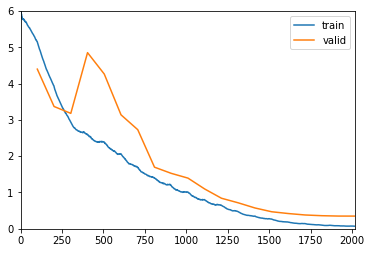

In [19]:
lr = 2e-3
wd = 1e-5
learn.fit_one_cycle(20, max_lr=lr, wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [20]:
learn.save('res50_20epochs_64bs_wd1e-5')

# Resnet50 20 Epochs bs 64 wd 1e-5, size=300x300, normalize batch stats

In [8]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [11]:
tfms = get_transforms()
img_data, _ = get_train_test_data(tfms=tfms, bs=64, sz=(300, 300), normalize="batch_stats")

In [12]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.229783,4.401031,0.103808,01:01
1,4.003542,3.349379,0.241400,00:53
2,3.069778,3.089804,0.281941,00:54
3,2.577511,3.746222,0.179361,00:54
4,2.390865,3.383487,0.230958,00:54
5,2.008732,3.061886,0.282555,00:54
6,1.734112,2.271859,0.415848,00:54
7,1.480726,1.754718,0.519042,00:54
8,1.185497,1.952041,0.483415,00:54
9,0.995037,1.452286,0.608722,00:54


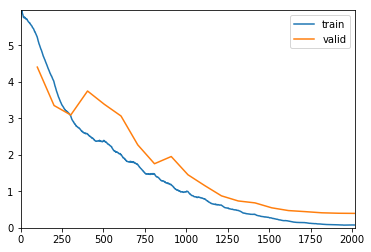

In [13]:
lr = 2e-3
wd = 1e-5
learn.fit_one_cycle(20, max_lr=lr, wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [14]:
learn.save('res50_20epochs_64bs_wd1e-5_normalize_batchstats')

# Resnet50 20 Epochs bs 64 wd 1e-5, size=300

In [26]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [27]:
tfms = get_transforms()
sz = 300    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [28]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.330255,4.525829,0.089681,01:01
1,4.273821,3.556685,0.214988,00:55
2,3.421353,3.725263,0.162776,00:55
3,3.001118,3.997042,0.146806,00:56
4,2.755847,3.753484,0.158477,00:55
5,2.385925,3.071087,0.278256,00:56
6,2.041492,2.667008,0.349509,00:56
7,1.721724,2.226933,0.437961,00:56
8,1.466654,1.602988,0.563882,00:57
9,1.250594,1.473425,0.593980,00:54


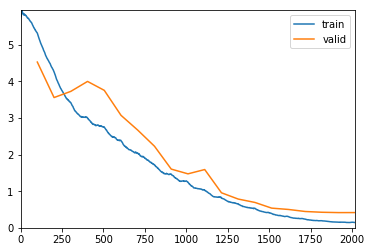

In [29]:
lr = 2e-3
wd = 1e-5
learn.fit_one_cycle(20, max_lr=lr, wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [ ]:
learn.save('res50_20epochs_64bs_wd1e-5')

# Resnet50 20 Epochs bs 64, size=224x224

In [12]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [13]:
tfms = get_transforms()
sz = (224, 224)    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [14]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.262793,4.434870,0.100123,00:43
1,4.095778,3.516619,0.218059,00:40
2,3.247416,3.333811,0.221130,00:40
3,2.944893,3.768213,0.165233,00:40
4,2.687114,3.883756,0.157248,00:41
5,2.461197,3.084675,0.271499,00:40
6,2.051124,2.820350,0.312039,00:40
7,1.776286,2.928091,0.292383,00:41
8,1.506207,2.151350,0.445946,00:41
9,1.236154,2.012717,0.457617,00:41


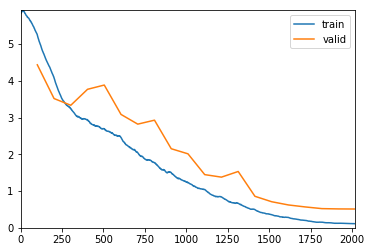

In [15]:
lr = 2e-3
wd = 1e-1
learn.fit_one_cycle(20, max_lr=lr, wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [11]:
learn.save('res50_20epochs_64bs_sz224x224')

# Resnet50 40 Epochs bs 64, size=224, max_zoom=1.05, wd=1e-3, lr=slice(lr/100, lr)

In [6]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [7]:
tfms = get_transforms(max_rotate=20.0, max_zoom=1.05)
sz = 224    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [8]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.630437,5.063973,0.028870,00:45
1,5.055996,4.442995,0.116708,00:45
2,4.305752,3.696890,0.213759,00:45
3,3.497288,2.916589,0.367322,00:45
4,2.653569,2.199481,0.506142,00:45
5,1.953425,1.594127,0.610565,00:44
6,1.417806,1.291124,0.657248,00:45
7,1.106169,1.207094,0.670762,00:44
8,0.950242,1.256185,0.670147,00:44
9,0.829560,1.222301,0.652334,00:44


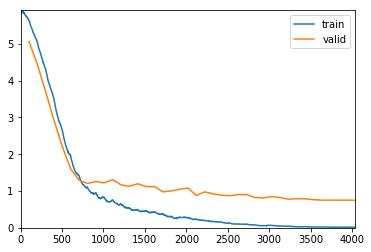

In [9]:
lr = 2e-3
wd = 1e-3
learn.fit_one_cycle(40, max_lr=slice(lr/100, lr), wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [10]:
learn.save('res50_20epochs_64bs_sz224_wd1e-3_lrslice')

# Resnet50 bs 64, size=224, max_zoom=1.05, wd=1e-3, 
- Train head: 20 epochs, lr=1e-2
- Train all: 40 epochs, lr=3e-3, lr=slice(lr/100, lr)

In [19]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [20]:
tfms = get_transforms(max_zoom=1.05)
sz = 224    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.1, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [21]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()

epoch,train_loss,valid_loss,accuracy,time
0,4.089922,3.095843,0.260442,00:45
1,3.301710,3.760842,0.197789,00:44
2,2.561916,2.276372,0.415233,00:43
3,2.138278,2.590694,0.367322,00:44
4,1.897824,2.108408,0.485258,00:44
5,1.605772,1.414977,0.606880,00:44
6,1.410858,1.447640,0.603194,00:44
7,1.281802,1.322650,0.626536,00:43
8,1.140561,1.056554,0.694103,00:43
9,0.951736,0.983931,0.740786,00:43


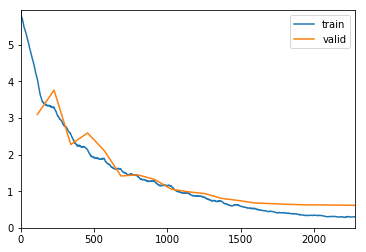

In [22]:
lr = 1e-2
wd = 1e-3
learn.fit_one_cycle(20, max_lr=lr, wd=wd, div_factor=10, pct_start=0.1)

In [23]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.441392,0.699588,0.792383,00:43
1,0.616522,1.350434,0.631450,00:44
2,0.850908,1.177598,0.687961,00:44
3,0.859552,1.268938,0.687961,00:44
4,0.777470,0.908860,0.750614,00:45
5,0.712275,0.824018,0.771499,00:44
6,0.630236,1.043273,0.712531,00:44
7,0.621753,0.858015,0.766585,00:44
8,0.542879,0.844745,0.767813,00:45
9,0.494797,0.713954,0.787469,00:45


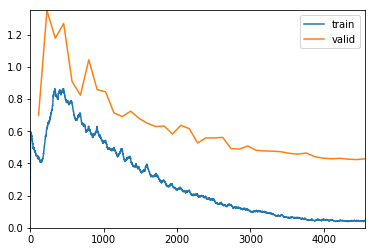

In [24]:
lr = 3e-3
wd = 1e-3
learn.fit_one_cycle(40, max_lr=slice(lr/100, lr), wd=wd, div_factor=10, pct_start=0.1)

In [25]:
learn.save('res50_head20epochs+all40epochs')

# Resnet50 bs 64, size=224x224, max_zoom=1.05, wd=1e-3, 
- Train head: 20 epochs, lr=1e-2
- Train all: 40 epochs, lr=3e-3, lr=slice(lr/100, lr)

In [5]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [6]:
tfms = get_transforms(max_zoom=1.05)
sz = (224, 224)    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.1, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [7]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()

epoch,train_loss,valid_loss,accuracy,time
0,3.954406,3.157214,0.257985,00:43
1,3.014693,3.666394,0.245700,00:40
2,2.342746,2.509044,0.382064,00:40
3,1.886994,1.968567,0.501229,00:41
4,1.603393,2.060127,0.476658,00:40
5,1.391098,1.836461,0.530713,00:40
6,1.201735,1.532361,0.617936,00:41
7,1.065786,1.376295,0.619165,00:40
8,0.925232,1.315705,0.663391,00:41
9,0.821337,1.077229,0.707617,00:41


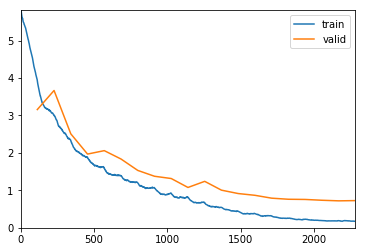

In [9]:
lr = 1e-2
wd = 1e-3
learn.fit_one_cycle(20, max_lr=lr, wd=wd, div_factor=10, pct_start=0.1)

In [10]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.333184,0.875890,0.751843,00:41
1,0.511239,1.624074,0.643735,00:41
2,0.762280,1.620425,0.603194,00:42
3,0.738116,1.293705,0.665848,00:41
4,0.672348,1.204278,0.701474,00:41
5,0.565010,1.122467,0.702703,00:41
6,0.526732,1.087537,0.714988,00:41
7,0.458649,0.982570,0.728501,00:41
8,0.416484,0.927291,0.785012,00:42
9,0.378276,0.931897,0.761671,00:43


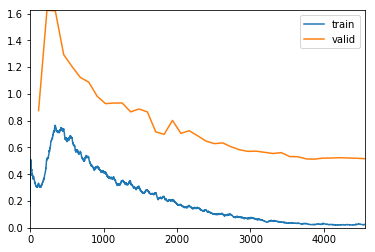

In [11]:
lr = 3e-3
wd = 1e-3
learn.fit_one_cycle(40, max_lr=slice(lr/100, lr), wd=wd, div_factor=10, pct_start=0.1)

In [ ]:
learn.save('res50_head20epochs+all40epochs')

# Resnet50 bs 64, size=300x300, wd=1e-3, 
- Train head: 10 epochs, lr=1e-2
- Train all: 20 epochs, lr=3e-3, lr=slice(lr/100, lr)

In [15]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [16]:
tfms = get_transforms()
sz = (300, 300)    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.1, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [17]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()

epoch,train_loss,valid_loss,accuracy,time
0,3.775938,3.930536,0.173219,00:47
1,2.611274,2.696842,0.302211,00:48
2,1.873002,2.465608,0.395577,00:48
3,1.407676,1.358409,0.646192,00:47
4,1.088817,1.345035,0.632678,00:47
5,0.792056,1.069256,0.713759,00:47
6,0.576660,0.748766,0.787469,00:47
7,0.410214,0.643467,0.821867,00:47
8,0.297559,0.621705,0.821867,00:47
9,0.264740,0.618597,0.830467,00:48


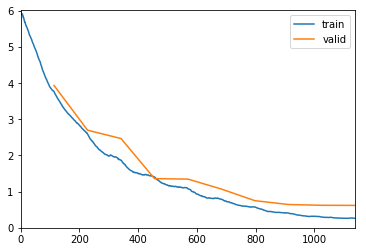

In [18]:
lr = 1e-2
wd = 1e-3
learn.fit_one_cycle(10, max_lr=lr, wd=wd, div_factor=10, pct_start=0.1)

In [19]:
learn.save("res50_sz300x300_head10epoch")

In [20]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.488256,1.423413,0.624079,00:57
1,0.935818,1.664527,0.592138,00:56
2,0.785981,1.234760,0.690418,00:57
3,0.616258,0.980210,0.735872,00:56
4,0.541401,0.956453,0.739558,00:56
5,0.447820,0.914886,0.759214,00:56
6,0.397087,0.800066,0.783784,00:56
7,0.335861,0.701296,0.818182,00:55
8,0.278630,0.683267,0.830467,00:56
9,0.235450,0.615877,0.848894,00:56


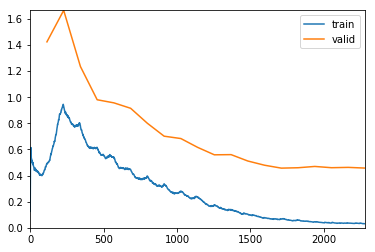

In [21]:
lr = 3e-3
wd = 1e-3
learn.fit_one_cycle(20, max_lr=slice(lr/100, lr), wd=wd, div_factor=10, pct_start=0.1)

# Resnet50 bs 64, size=300x300, wd=1e-3, 
- Train head: 20 epochs, lr=1e-2
- Train all: 40 epochs, lr=3e-3, lr=slice(lr/10, lr)

In [22]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [23]:
tfms = get_transforms()
sz = (300, 300)    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.1, bs=bs)
# img_data_test = ImageDataBunch.from_df(test_path, test_df,
#                                   ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [24]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()

epoch,train_loss,valid_loss,accuracy,time
0,4.679777,3.679395,0.186732,00:48
1,2.968116,2.066556,0.480344,00:48
2,1.990906,1.901648,0.507371,00:48
3,1.945187,2.003522,0.485258,00:48
4,1.854728,2.308264,0.458231,00:48
5,1.616523,1.797302,0.512285,00:48
6,1.365278,1.945851,0.497543,00:48
7,1.221534,1.902874,0.520885,00:48
8,1.049224,1.087537,0.701474,00:48
9,0.932221,1.183299,0.685504,00:48


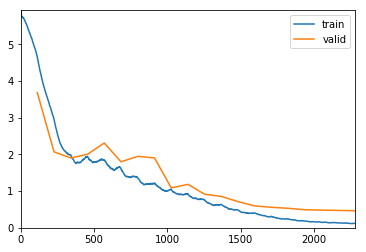

In [25]:
lr = 1e-2
wd = 1e-3
learn.fit_one_cycle(20, max_lr=lr, wd=wd, div_factor=25, pct_start=0.3)

In [26]:
learn.save("res50_sz300x300_head20epoch")

In [28]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.221410,0.589215,0.830467,00:58
1,0.240330,0.732369,0.805897,00:57
2,0.377359,0.895248,0.762899,00:58
3,0.555493,1.250012,0.681818,00:56
4,0.678545,1.176592,0.699017,00:56
5,0.786027,1.229990,0.679361,00:56
6,0.788545,1.328949,0.680590,00:56
7,0.805984,1.296095,0.678133,00:56
8,0.781039,1.242152,0.670762,00:56
9,0.718895,1.264194,0.648649,00:56


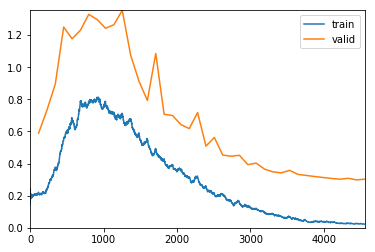

In [29]:
lr = 3e-3
wd = 1e-3
learn.fit_one_cycle(40, max_lr=slice(lr/10, lr), wd=wd, div_factor=25, pct_start=0.3)

In [30]:
learn.save("res50_sz300x300_20+40epochs_9226")

In [31]:
learn.export("exported_models/res50_exported.pkl")

# Resnet50 bs 64, size=300x300, wd=1e-3, zoomcrop, cutout, norm_imagenet, LabelSmoothing, mixup
- Train head: 20 epochs, lr=1e-2
- Train all: 40 epochs, lr=3e-3, lr=slice(lr/10, lr)

In [6]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [7]:
xtra_tfms = zoom_crop(scale=(0.75,2.0), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 50), p=0.8)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
img_data, _ = get_train_test_data(tfms=tfms, bs=64, sz=(300, 300), normalize="imagenet")

In [8]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], 
                    loss_func=LabelSmoothingCrossEntropy(), path='.', callback_fns=ShowGraph).mixup(alpha=0.2)
learn = learn.to_fp16()

epoch,train_loss,valid_loss,accuracy,time
0,5.305611,4.386062,0.121622,00:50
1,4.490379,3.422140,0.304668,00:47
2,3.969381,3.139847,0.340909,00:46
3,3.821317,3.302506,0.330467,00:46
4,3.682738,2.913522,0.404177,00:46
5,3.534435,2.919809,0.417076,00:46
6,3.392220,2.491318,0.539312,00:46
7,3.239245,2.299310,0.600123,00:46
8,3.128954,2.370777,0.576167,00:47
9,3.015674,2.200319,0.642506,00:46


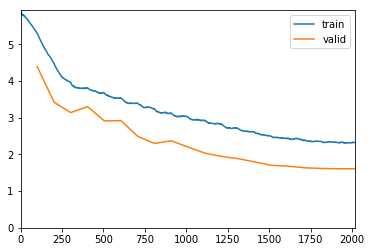

In [9]:
lr = 1e-2
wd = 1e-3
learn.fit_one_cycle(20, max_lr=lr, wd=wd, div_factor=25, pct_start=0.3)

In [10]:
learn.save("res50_sz300x300_all_regularizers_head20epoch")

In [11]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,2.359570,1.646891,0.810811,00:55
1,2.328458,1.690502,0.799754,00:54
2,2.396772,1.787361,0.768427,00:54
3,2.465511,1.944433,0.699631,00:54
4,2.565477,2.047533,0.682432,00:54
5,2.612764,1.949485,0.706388,00:54
6,2.654017,2.303655,0.581081,00:54
7,2.674669,2.085808,0.651106,00:54
8,2.654920,2.056552,0.684275,00:54
9,2.680012,2.163956,0.644349,00:54


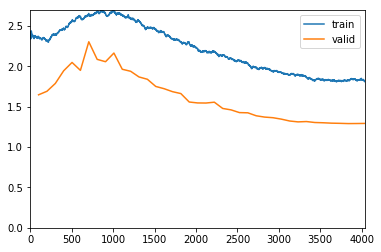

In [12]:
lr = 3e-3
wd = 1e-3
learn.fit_one_cycle(40, max_lr=slice(lr/10, lr), wd=wd, div_factor=25, pct_start=0.3)

In [13]:
learn.save("res50_sz300x300_all_regularizers_20+40epoch")

# Resnet50 bs 64, size=300x300, wd=1e-3, zoomcrop, cutout, norm_imagenet, LabelSmoothing, mixup
- Train head: 20 epochs, lr=1e-2
- Train all: 40 epochs, lr=3e-3, lr=slice(lr/10, lr)

In [6]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [7]:
xtra_tfms = zoom_crop(scale=(0.75,1.5), do_rand=True) + [cutout(n_holes=(1,4), length=(10, 40), p=0.5)]
tfms = get_transforms(xtra_tfms=xtra_tfms)
img_data, _ = get_train_test_data(tfms=tfms, bs=64, sz=(300, 300), normalize="imagenet")

In [8]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], 
                    loss_func=LabelSmoothingCrossEntropy(), path='.', callback_fns=ShowGraph).mixup(alpha=0.2)
learn = learn.to_fp16()

epoch,train_loss,valid_loss,accuracy,time
0,5.215449,4.207166,0.161548,00:51
1,4.235101,3.087655,0.366708,00:46
2,3.636558,2.836840,0.422604,00:46
3,3.479630,3.482900,0.309582,00:46
4,3.367283,2.666444,0.480344,00:46
5,3.209716,2.658309,0.498771,00:46
6,3.063023,2.435032,0.556511,00:47
7,2.897451,2.382990,0.580467,00:46
8,2.797493,2.172968,0.648034,00:47
9,2.715557,2.034592,0.695946,00:46


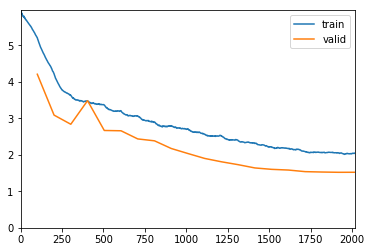

In [9]:
lr = 1e-2
wd = 1e-3
learn.fit_one_cycle(20, max_lr=lr, wd=wd, div_factor=25, pct_start=0.3)

In [10]:
learn.save("res50_sz300x300_all_regularizers_lower_head20epoch")

In [11]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,2.132832,1.532364,0.840295,00:55
1,2.060383,1.578616,0.832310,00:54
2,2.130992,1.679401,0.791155,00:54
3,2.212901,1.840963,0.742015,00:54
4,2.250211,1.932621,0.711916,00:54
5,2.334876,1.897777,0.726658,00:54
6,2.370283,2.035687,0.689189,00:54
7,2.398716,1.942368,0.718673,00:54
8,2.398080,2.045888,0.675676,00:54
9,2.419530,1.859080,0.741400,00:54


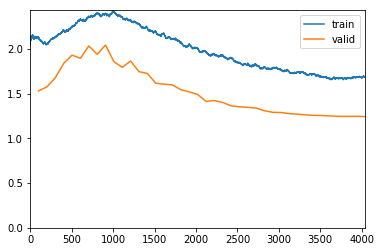

In [12]:
lr = 3e-3
wd = 1e-3
learn.fit_one_cycle(40, max_lr=slice(lr/10, lr), wd=wd, div_factor=25, pct_start=0.3)

In [14]:
learn.save("res50_sz300x300_all_regularizers_lower_20+40epoch")

In [18]:
learn.model[-1][7].p = 0.25

epoch,train_loss,valid_loss,accuracy,time
0,1.624794,1.259583,0.911548,00:54
1,1.622190,1.259717,0.918305,00:55
2,1.636342,1.260589,0.915233,00:56
3,1.612538,1.253005,0.915233,00:55
4,1.615796,1.252289,0.916462,00:56
5,1.601871,1.253297,0.917076,00:56


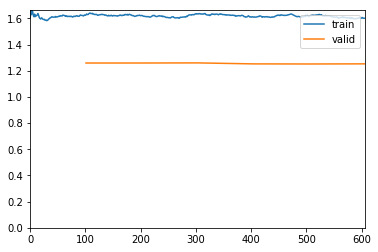

In [21]:
lr = 3e-4
wd = 1e-5
learn.fit_one_cycle(6, max_lr=slice(lr/10, lr), wd=wd, div_factor=25, pct_start=0.1)

In [22]:
learn.save("res50_sz300x300_all_regularizers_lower_20+40epoch-2")

# fin